In [2]:
import os


import pandas as pd
pd.set_option('display.max_column',None)


import warnings
warnings.filterwarnings('ignore')


import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2, chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import pearsonr


import sklearn
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_val_predict, train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE

get_ipython().run_line_magic('matplotlib', 'inline')
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
df = pd.read_csv(r'D:\Uddhav\DATA SCIENCE\ML PROJECTS\Logistic regression\Vaccine Usage\h1n1_vaccine_prediction.csv')
df

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [3]:
df.replace(' ', np.nan, inplace = True)

Text(0.5, 1.0, 'Heat Map')

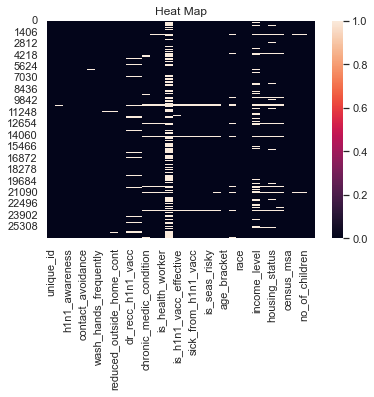

In [4]:
sns.heatmap(df.isnull())
plt.title("Heat Map")

In [5]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11794 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  11794 non-null  int64  
 1   h1n1_worry                 11794 non-null  float64
 2   h1n1_awareness             11794 non-null  float64
 3   antiviral_medication       11794 non-null  float64
 4   contact_avoidance          11794 non-null  float64
 5   bought_face_mask           11794 non-null  float64
 6   wash_hands_frequently      11794 non-null  float64
 7   avoid_large_gatherings     11794 non-null  float64
 8   reduced_outside_home_cont  11794 non-null  float64
 9   avoid_touch_face           11794 non-null  float64
 10  dr_recc_h1n1_vacc          11794 non-null  float64
 11  dr_recc_seasonal_vacc      11794 non-null  float64
 12  chronic_medic_condition    11794 non-null  float64
 13  cont_child_undr_6_mnths    11794 non-null  flo

In [6]:
df.drop(columns =['unique_id','bought_face_mask','contact_avoidance','bought_face_mask','wash_hands_frequently','avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc','dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths','is_seas_vacc_effective', 'is_seas_risky',
       'sick_from_seas_vacc','race', 'sex',
       'income_level', 'marital_status', 'housing_status', 'employment',
       'census_msa', 'no_of_adults', 'no_of_children'], axis=1, inplace=True)

# Creating Dummies

In [7]:
cat_vars=['age_bracket', 'qualification']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    data=df.join(cat_list)
    df=data

In [8]:
cat_vars=['age_bracket', 'qualification']
df_vars=df.columns.values.tolist()
to_keep=[i for i in df_vars if i not in cat_vars]

In [9]:
df_final=df[to_keep]
df_final.columns.values

array(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'h1n1_vaccine',
       'age_bracket_18 - 34 Years', 'age_bracket_35 - 44 Years',
       'age_bracket_45 - 54 Years', 'age_bracket_55 - 64 Years',
       'age_bracket_65+ Years', 'qualification_12 Years',
       'qualification_< 12 Years', 'qualification_College Graduate',
       'qualification_Some College'], dtype=object)

# Dropping Original Columns

In [10]:
df.drop(columns=['age_bracket', 'qualification'], 
        axis=1, inplace=True)

# Sampling Using SMOTE

In [15]:
X = df_final.loc[:, df_final.columns != 'h1n1_vaccine']
y = df_final.loc[:, df_final.columns == 'h1n1_vaccine']

os = SMOTE(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['h1n1_vaccine'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['h1n1_vaccine']==0]))
print("Number of subscription",len(os_data_y[os_data_y['h1n1_vaccine']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['h1n1_vaccine']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['h1n1_vaccine']==1])/len(os_data_X))

length of oversampled data is  11514
Number of no subscription in oversampled data 5757
Number of subscription 5757
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


# Feature Selection

In [17]:
df_final_vars=df_final.columns.values.tolist()
y=['h1n1_vaccine']
X=[i for i in df_final_vars if i not in y]

logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [18]:
df.columns

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'h1n1_vaccine',
       'age_bracket_18 - 34 Years', 'age_bracket_35 - 44 Years',
       'age_bracket_45 - 54 Years', 'age_bracket_55 - 64 Years',
       'age_bracket_65+ Years', 'qualification_12 Years',
       'qualification_< 12 Years', 'qualification_College Graduate',
       'qualification_Some College'],
      dtype='object')

In [19]:
cols=['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc',
       'age_bracket_18 - 34 Years', 'age_bracket_35 - 44 Years',
       'age_bracket_45 - 54 Years', 'age_bracket_55 - 64 Years',
       'age_bracket_65+ Years', 'qualification_12 Years',
       'qualification_< 12 Years', 'qualification_College Graduate',
       'qualification_Some College'] 
X=os_data_X[cols]
y=os_data_y['h1n1_vaccine']

# Model 1

In [20]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.495495
         Iterations 6
                                Results: Logit
Model:                    Logit                Pseudo R-squared:     0.285     
Dependent Variable:       h1n1_vaccine         AIC:                  11444.2559
Date:                     2022-01-09 22:55     BIC:                  11569.2283
No. Observations:         11514                Log-Likelihood:       -5705.1   
Df Model:                 16                   LL-Null:              -7980.9   
Df Residuals:             11497                LLR p-value:          0.0000    
Converged:                1.0000               Scale:                1.0000    
No. Iterations:           6.0000                                               
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------

# Model 2

In [21]:
df.drop(columns = ['antiviral_medication','sick_from_h1n1_vacc'],axis=1, inplace=True)

In [22]:
df.columns

Index(['h1n1_worry', 'h1n1_awareness', 'is_health_worker', 'has_health_insur',
       'is_h1n1_vacc_effective', 'is_h1n1_risky', 'h1n1_vaccine',
       'age_bracket_18 - 34 Years', 'age_bracket_35 - 44 Years',
       'age_bracket_45 - 54 Years', 'age_bracket_55 - 64 Years',
       'age_bracket_65+ Years', 'qualification_12 Years',
       'qualification_< 12 Years', 'qualification_College Graduate',
       'qualification_Some College'],
      dtype='object')

In [23]:
cols=['h1n1_worry', 'h1n1_awareness',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky',
       'age_bracket_18 - 34 Years', 'age_bracket_35 - 44 Years',
       'age_bracket_45 - 54 Years', 'age_bracket_55 - 64 Years',
       'age_bracket_65+ Years', 'qualification_12 Years',
       'qualification_< 12 Years', 'qualification_College Graduate',
       'qualification_Some College'] 
X=os_data_X[cols]
y=os_data_y['h1n1_vaccine']

In [24]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.495799
         Iterations 6
                                Results: Logit
Model:                    Logit                Pseudo R-squared:     0.285     
Dependent Variable:       h1n1_vaccine         AIC:                  11447.2664
Date:                     2022-01-09 22:57     BIC:                  11557.5362
No. Observations:         11514                Log-Likelihood:       -5708.6   
Df Model:                 14                   LL-Null:              -7980.9   
Df Residuals:             11499                LLR p-value:          0.0000    
Converged:                1.0000               Scale:                1.0000    
No. Iterations:           6.0000                                               
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [26]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.77


In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1385  379]
 [ 404 1287]]


In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1764
           1       0.77      0.76      0.77      1691

    accuracy                           0.77      3455
   macro avg       0.77      0.77      0.77      3455
weighted avg       0.77      0.77      0.77      3455



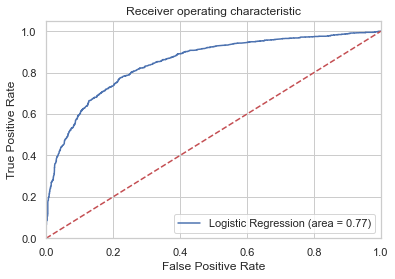

In [29]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Different solver

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#logreg = LogisticRegression(solver = '', random_state=0)
#logreg.fit(X_train, y_train)

# Model 3

In [8]:
df = pd.read_csv(r'D:\Uddhav\DATA SCIENCE\ML PROJECTS\Logistic regression\Vaccine Usage\h1n1_vaccine_prediction.csv')
df

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [5]:
df.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [9]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11794 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  11794 non-null  int64  
 1   h1n1_worry                 11794 non-null  float64
 2   h1n1_awareness             11794 non-null  float64
 3   antiviral_medication       11794 non-null  float64
 4   contact_avoidance          11794 non-null  float64
 5   bought_face_mask           11794 non-null  float64
 6   wash_hands_frequently      11794 non-null  float64
 7   avoid_large_gatherings     11794 non-null  float64
 8   reduced_outside_home_cont  11794 non-null  float64
 9   avoid_touch_face           11794 non-null  float64
 10  dr_recc_h1n1_vacc          11794 non-null  float64
 11  dr_recc_seasonal_vacc      11794 non-null  float64
 12  chronic_medic_condition    11794 non-null  float64
 13  cont_child_undr_6_mnths    11794 non-null  flo

In [10]:
df.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [11]:
df.drop(columns = ['unique_id','contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face','cont_child_undr_6_mnths','is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc','race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children'], axis=1, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11794 entries, 0 to 26706
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   h1n1_worry               11794 non-null  float64
 1   h1n1_awareness           11794 non-null  float64
 2   antiviral_medication     11794 non-null  float64
 3   dr_recc_h1n1_vacc        11794 non-null  float64
 4   dr_recc_seasonal_vacc    11794 non-null  float64
 5   chronic_medic_condition  11794 non-null  float64
 6   is_health_worker         11794 non-null  float64
 7   has_health_insur         11794 non-null  float64
 8   is_h1n1_vacc_effective   11794 non-null  float64
 9   is_h1n1_risky            11794 non-null  float64
 10  sick_from_h1n1_vacc      11794 non-null  float64
 11  age_bracket              11794 non-null  object 
 12  qualification            11794 non-null  object 
 13  h1n1_vaccine             11794 non-null  int64  
dtypes: float64(11), int64(

# Creating Dummies

In [13]:
cat_vars=['age_bracket', 'qualification']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    data=df.join(cat_list)
    df=data

In [14]:
cat_vars=['age_bracket', 'qualification']
df_vars=df.columns.values.tolist()
to_keep=[i for i in df_vars if i not in cat_vars]

In [15]:
df_final=df[to_keep]
df_final.columns.values

array(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'is_health_worker', 'has_health_insur',
       'is_h1n1_vacc_effective', 'is_h1n1_risky', 'sick_from_h1n1_vacc',
       'h1n1_vaccine', 'age_bracket_18 - 34 Years',
       'age_bracket_35 - 44 Years', 'age_bracket_45 - 54 Years',
       'age_bracket_55 - 64 Years', 'age_bracket_65+ Years',
       'qualification_12 Years', 'qualification_< 12 Years',
       'qualification_College Graduate', 'qualification_Some College'],
      dtype=object)

# Dropping Original Columns

In [16]:
df.drop(columns=['age_bracket', 'qualification'], 
        axis=1, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11794 entries, 0 to 26706
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   h1n1_worry                      11794 non-null  float64
 1   h1n1_awareness                  11794 non-null  float64
 2   antiviral_medication            11794 non-null  float64
 3   dr_recc_h1n1_vacc               11794 non-null  float64
 4   dr_recc_seasonal_vacc           11794 non-null  float64
 5   chronic_medic_condition         11794 non-null  float64
 6   is_health_worker                11794 non-null  float64
 7   has_health_insur                11794 non-null  float64
 8   is_h1n1_vacc_effective          11794 non-null  float64
 9   is_h1n1_risky                   11794 non-null  float64
 10  sick_from_h1n1_vacc             11794 non-null  float64
 11  h1n1_vaccine                    11794 non-null  int64  
 12  age_bracket_18 - 34 Years       

# Sampling Using SMOTE

In [18]:
X = df_final.loc[:, df_final.columns != 'h1n1_vaccine']
y = df_final.loc[:, df_final.columns == 'h1n1_vaccine']

os = SMOTE(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['h1n1_vaccine'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['h1n1_vaccine']==0]))
print("Number of subscription",len(os_data_y[os_data_y['h1n1_vaccine']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['h1n1_vaccine']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['h1n1_vaccine']==1])/len(os_data_X))

length of oversampled data is  11514
Number of no subscription in oversampled data 5757
Number of subscription 5757
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


# Feature Selection

In [19]:
df_final_vars=df_final.columns.values.tolist()
y=['h1n1_vaccine']
X=[i for i in df_final_vars if i not in y]

logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [20]:
df.columns

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc', 'chronic_medic_condition',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'h1n1_vaccine',
       'age_bracket_18 - 34 Years', 'age_bracket_35 - 44 Years',
       'age_bracket_45 - 54 Years', 'age_bracket_55 - 64 Years',
       'age_bracket_65+ Years', 'qualification_12 Years',
       'qualification_< 12 Years', 'qualification_College Graduate',
       'qualification_Some College'],
      dtype='object')

In [21]:
cols=['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc', 'chronic_medic_condition',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc',
       'age_bracket_18 - 34 Years', 'age_bracket_35 - 44 Years',
       'age_bracket_45 - 54 Years', 'age_bracket_55 - 64 Years',
       'age_bracket_65+ Years', 'qualification_12 Years',
       'qualification_< 12 Years', 'qualification_College Graduate',
       'qualification_Some College'] 
X=os_data_X[cols]
y=os_data_y['h1n1_vaccine']

In [22]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.430415
         Iterations 7
                                Results: Logit
Model:                    Logit                Pseudo R-squared:     0.379     
Dependent Variable:       h1n1_vaccine         AIC:                  9951.5959 
Date:                     2022-01-10 13:08     BIC:                  10098.6222
No. Observations:         11514                Log-Likelihood:       -4955.8   
Df Model:                 19                   LL-Null:              -7980.9   
Df Residuals:             11494                LLR p-value:          0.0000    
Converged:                1.0000               Scale:                1.0000    
No. Iterations:           7.0000                                               
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------

In [23]:
df.drop(columns=['antiviral_medication'], axis=1, inplace=True)

In [25]:
cols=['h1n1_worry', 'h1n1_awareness',
       'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc', 'chronic_medic_condition',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc',
       'age_bracket_18 - 34 Years', 'age_bracket_35 - 44 Years',
       'age_bracket_45 - 54 Years', 'age_bracket_55 - 64 Years',
       'age_bracket_65+ Years', 'qualification_12 Years',
       'qualification_< 12 Years', 'qualification_College Graduate',
       'qualification_Some College'] 
X=os_data_X[cols]
y=os_data_y['h1n1_vaccine']

In [26]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.430528
         Iterations 7
                                Results: Logit
Model:                    Logit                Pseudo R-squared:     0.379     
Dependent Variable:       h1n1_vaccine         AIC:                  9952.1908 
Date:                     2022-01-10 13:09     BIC:                  10091.8658
No. Observations:         11514                Log-Likelihood:       -4957.1   
Df Model:                 18                   LL-Null:              -7980.9   
Df Residuals:             11495                LLR p-value:          0.0000    
Converged:                1.0000               Scale:                1.0000    
No. Iterations:           7.0000                                               
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [28]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.81


In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1484  280]
 [ 370 1321]]


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1764
           1       0.83      0.78      0.80      1691

    accuracy                           0.81      3455
   macro avg       0.81      0.81      0.81      3455
weighted avg       0.81      0.81      0.81      3455



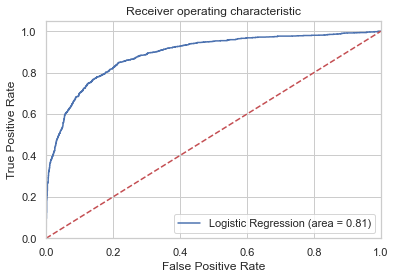

In [31]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()